In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import os

In [2]:
rave_sim_dir = Path('/mnt/d/rave-sim-main/rave-sim-main')
simulations_dir = Path('/mnt/d/rave-sim-main/rave-sim-main/output')
scratch_dir = simulations_dir

In [3]:
sys.path.insert(0, str(rave_sim_dir / "big-wave"))
#print(str(rave_sim_dir / "big-wave"))
import multisim
import config
import util

In [4]:
config_dict = {
    "sim_params": {
        "N": 2**25,
        "dx": 3.1e-10,
        "z_detector":4.8,
        "detector_size": 3e-3,
        "detector_pixel_size_x": 20e-6,
        "detector_pixel_size_y": 1,
        "chunk_size": 256 * 1024 * 1024 // 16,  # use 256MB chunks
    },
    "use_disk_vector": False,
    "save_final_u_vectors": False,
    "dtype": "c8",
    "multisource": {
        "type": "points",
        "energy_range": [9900, 10100],
        "x_range": [-3e-6, 3e-6],
        "z": 0.0,
        "nr_source_points": 20,
        "seed": 1,
        #"spectrum": "/mnt/d/rave-sim-main/rave-sim-main/spectrum/spectrum_25keV.h5",
    },
    "elements": [
        {
            "type": "sample",
            "z_start": 0.8,
            "pixel_size_x": 1 * 1e-6,
            "pixel_size_z": 1 * 1e-6,
            "grid_path":"/mnt/d/rave-sim-main/rave-sim-main/grid/double_ring_150_100_35.npy",
            "materials": [["C", 1.3],["T", 0.25]],
            "x_positions":[0],
        },
    ],
}

print("N: ", config_dict["sim_params"]["N"])

N:  33554432


In [5]:
sim_path = multisim.setup_simulation(config_dict, Path("."), simulations_dir)

2025-08-16 00:39:17,089 INFO: Setting up simulation


ValueError: 'T' is not an element symbol:
T
^


In [6]:
computed = config.load(Path(sim_path / 'computed.yaml'))

#print("cutoff angles:", computed['cutoff_angles'])
#print("source points:", computed['source_points'])

In [7]:
# Run this in a for loop to simulate all source points or
# alternatively run the source points as individual euler
# jobs
#for i in range(20):
#    multisim.run_single_simulation(sim_path, i, scratch_dir, save_keypoints_path=scratch_dir)
for i in tqdm(range(config_dict["multisource"]["nr_source_points"])):
    os.system(f"CUDA_VISIBLE_DEVICES=0 /mnt/d/rave-sim-main/rave-sim-main/fast-wave/build-Release/fastwave -s {i} {sim_path}")

  0%|                                                                                            | 0/20 [00:00<?, ?it/s]

[2025-08-16 00:14:33.771] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000000
[2025-08-16 00:14:34.423] [info] Simulating optical element 1/1


  5%|████▏                                                                               | 1/20 [00:04<01:25,  4.52s/it]

[2025-08-16 00:14:38.144] [info] Elapsed time for optical element: 3434.0198 ms
[2025-08-16 00:14:38.166] [info] Simulation finished in 4.395044297 seconds
[2025-08-16 00:14:38.270] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000001
[2025-08-16 00:14:38.579] [info] Simulating optical element 1/1


 10%|████████▍                                                                           | 2/20 [00:08<01:17,  4.31s/it]

[2025-08-16 00:14:42.299] [info] Elapsed time for optical element: 3434.041 ms
[2025-08-16 00:14:42.322] [info] Simulation finished in 4.051951547 seconds
[2025-08-16 00:14:42.420] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000002
[2025-08-16 00:14:42.717] [info] Simulating optical element 1/1


 15%|████████████▌                                                                       | 3/20 [00:12<01:11,  4.23s/it]

[2025-08-16 00:14:46.437] [info] Elapsed time for optical element: 3433.5972 ms
[2025-08-16 00:14:46.460] [info] Simulation finished in 4.039805427 seconds
[2025-08-16 00:14:46.561] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000003
[2025-08-16 00:14:46.865] [info] Simulating optical element 1/1


 20%|████████████████▊                                                                   | 4/20 [00:16<01:07,  4.20s/it]

[2025-08-16 00:14:50.598] [info] Elapsed time for optical element: 3445.938 ms
[2025-08-16 00:14:50.623] [info] Simulation finished in 4.061753912 seconds
[2025-08-16 00:14:50.722] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000004
[2025-08-16 00:14:51.020] [info] Simulating optical element 1/1


 25%|█████████████████████                                                               | 5/20 [00:21<01:02,  4.18s/it]

[2025-08-16 00:14:54.750] [info] Elapsed time for optical element: 3441.964 ms
[2025-08-16 00:14:54.773] [info] Simulation finished in 4.050487198 seconds
[2025-08-16 00:14:54.874] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000005
[2025-08-16 00:14:55.185] [info] Simulating optical element 1/1


 30%|█████████████████████████▏                                                          | 6/20 [00:25<00:58,  4.18s/it]

[2025-08-16 00:14:58.913] [info] Elapsed time for optical element: 3440.581 ms
[2025-08-16 00:14:58.935] [info] Simulation finished in 4.061539167 seconds
[2025-08-16 00:14:59.037] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000006
[2025-08-16 00:14:59.345] [info] Simulating optical element 1/1


 35%|█████████████████████████████▍                                                      | 7/20 [00:29<00:54,  4.17s/it]

[2025-08-16 00:15:03.075] [info] Elapsed time for optical element: 3442.839 ms
[2025-08-16 00:15:03.097] [info] Simulation finished in 4.06017886 seconds
[2025-08-16 00:15:03.192] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000007
[2025-08-16 00:15:03.500] [info] Simulating optical element 1/1


 40%|█████████████████████████████████▌                                                  | 8/20 [00:31<00:40,  3.38s/it]

[2025-08-16 00:15:04.743] [info] Elapsed time for optical element: 3438.336 ms
[2025-08-16 00:15:04.765] [info] Simulation finished in 4.055472513 seconds
[2025-08-16 00:15:04.868] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000008
[2025-08-16 00:15:05.171] [info] Simulating optical element 1/1


 45%|█████████████████████████████████████▊                                              | 9/20 [00:35<00:39,  3.62s/it]

[2025-08-16 00:15:08.894] [info] Elapsed time for optical element: 3436.493 ms
[2025-08-16 00:15:08.916] [info] Simulation finished in 4.048731048 seconds
[2025-08-16 00:15:09.015] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000009
[2025-08-16 00:15:09.325] [info] Simulating optical element 1/1


 50%|█████████████████████████████████████████▌                                         | 10/20 [00:39<00:37,  3.78s/it]

[2025-08-16 00:15:13.047] [info] Elapsed time for optical element: 3435.498 ms
[2025-08-16 00:15:13.070] [info] Simulation finished in 4.055782847 seconds
[2025-08-16 00:15:13.174] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000010
[2025-08-16 00:15:13.484] [info] Simulating optical element 1/1


 55%|█████████████████████████████████████████████▋                                     | 11/20 [00:43<00:35,  3.90s/it]

[2025-08-16 00:15:17.211] [info] Elapsed time for optical element: 3440.2805 ms
[2025-08-16 00:15:17.233] [info] Simulation finished in 4.059369956 seconds
[2025-08-16 00:15:17.332] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000011
[2025-08-16 00:15:17.639] [info] Simulating optical element 1/1


 60%|█████████████████████████████████████████████████▊                                 | 12/20 [00:47<00:31,  3.98s/it]

[2025-08-16 00:15:21.363] [info] Elapsed time for optical element: 3437.2717 ms
[2025-08-16 00:15:21.386] [info] Simulation finished in 4.053404986 seconds
[2025-08-16 00:15:21.481] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000012
[2025-08-16 00:15:21.778] [info] Simulating optical element 1/1


 65%|█████████████████████████████████████████████████████▉                             | 13/20 [00:51<00:28,  4.03s/it]

[2025-08-16 00:15:25.504] [info] Elapsed time for optical element: 3439.2654 ms
[2025-08-16 00:15:25.526] [info] Simulation finished in 4.045755163 seconds
[2025-08-16 00:15:25.626] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000013
[2025-08-16 00:15:25.943] [info] Simulating optical element 1/1


 70%|██████████████████████████████████████████████████████████                         | 14/20 [00:56<00:24,  4.07s/it]

[2025-08-16 00:15:29.670] [info] Elapsed time for optical element: 3439.5933 ms
[2025-08-16 00:15:29.692] [info] Simulation finished in 4.065736531 seconds
[2025-08-16 00:15:29.792] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000014
[2025-08-16 00:15:30.090] [info] Simulating optical element 1/1


 75%|██████████████████████████████████████████████████████████████▎                    | 15/20 [01:00<00:20,  4.09s/it]

[2025-08-16 00:15:33.818] [info] Elapsed time for optical element: 3440.8848 ms
[2025-08-16 00:15:33.840] [info] Simulation finished in 4.048317048 seconds
[2025-08-16 00:15:33.935] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000015
[2025-08-16 00:15:34.241] [info] Simulating optical element 1/1


 80%|██████████████████████████████████████████████████████████████████▍                | 16/20 [01:01<00:13,  3.36s/it]

[2025-08-16 00:15:35.468] [info] Elapsed time for optical element: 3441.4072 ms
[2025-08-16 00:15:35.491] [info] Simulation finished in 4.057849693 seconds
[2025-08-16 00:15:35.590] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000016
[2025-08-16 00:15:35.893] [info] Simulating optical element 1/1


 85%|██████████████████████████████████████████████████████████████████████▌            | 17/20 [01:06<00:10,  3.60s/it]

[2025-08-16 00:15:39.632] [info] Elapsed time for optical element: 3450.8225 ms
[2025-08-16 00:15:39.656] [info] Simulation finished in 4.065659391 seconds
[2025-08-16 00:15:39.752] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000017
[2025-08-16 00:15:40.058] [info] Simulating optical element 1/1


 90%|██████████████████████████████████████████████████████████████████████████▋        | 18/20 [01:10<00:07,  3.77s/it]

[2025-08-16 00:15:43.785] [info] Elapsed time for optical element: 3439.415 ms
[2025-08-16 00:15:43.806] [info] Simulation finished in 4.053493223 seconds
[2025-08-16 00:15:43.904] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000018
[2025-08-16 00:15:44.208] [info] Simulating optical element 1/1


 95%|██████████████████████████████████████████████████████████████████████████████▊    | 19/20 [01:14<00:03,  3.88s/it]

[2025-08-16 00:15:47.936] [info] Elapsed time for optical element: 3441.3762 ms
[2025-08-16 00:15:47.958] [info] Simulation finished in 4.053974414 seconds
[2025-08-16 00:15:48.054] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/08/20250816_001433463794/00000019
[2025-08-16 00:15:48.364] [info] Simulating optical element 1/1


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [01:18<00:00,  3.92s/it]

[2025-08-16 00:15:52.093] [info] Elapsed time for optical element: 3441.7407 ms
[2025-08-16 00:15:52.115] [info] Simulation finished in 4.060472023 seconds


In [8]:
wavefronts = util.load_wavefronts_filtered(sim_path, x_range=(-3e-6, 3e-6))
print("nr sources loaded:", len(wavefronts))
wavef= [result[0] for result in wavefronts]
wf = np.sum(wavef, axis=0)
print("nr phase steps:", wf.shape[0])
print("nr detector pixels:", wf.shape[1])

nr sources loaded: 12
nr phase steps: 1
nr detector pixels: 150


[9.99586246e-06 1.06563930e-05 1.03761158e-05 1.04716300e-05
 1.04723586e-05 1.04501059e-05 1.04800911e-05 1.04858900e-05
 1.04939872e-05 1.05118861e-05 1.05700947e-05 1.04984611e-05
 1.06754414e-05 1.05703857e-05 1.06152738e-05 1.07074193e-05
 1.07837650e-05 1.08164841e-05 1.08031863e-05 1.10453302e-05
 1.10623459e-05 1.12397347e-05 1.15126395e-05 1.17123536e-05
 1.20943650e-05 1.28609736e-05 1.25619990e-05 1.27937301e-05
 2.28420995e-05 8.32784735e-06 9.73897204e-06 7.64010474e-06
 8.14870418e-06 7.46205933e-06 8.59354077e-06 9.05946945e-06
 9.11802454e-06 8.63606510e-06 8.42547342e-06 9.65829622e-06
 9.51185393e-06 1.00658444e-05 8.75906426e-06 4.36913888e-06
 1.97153895e-06 8.34156538e-07 2.16550461e-06 1.03456168e-05
 1.96365836e-05 1.35972296e-05 1.15918338e-05 1.08428976e-05
 1.02793883e-05 1.06649113e-05 1.07698679e-05 9.97139614e-06
 1.00349025e-05 1.01108553e-05 1.07263049e-05 1.01915157e-05
 9.75194598e-06 1.03468274e-05 1.11200634e-05 7.26562212e-06
 4.55965392e-06 6.175407

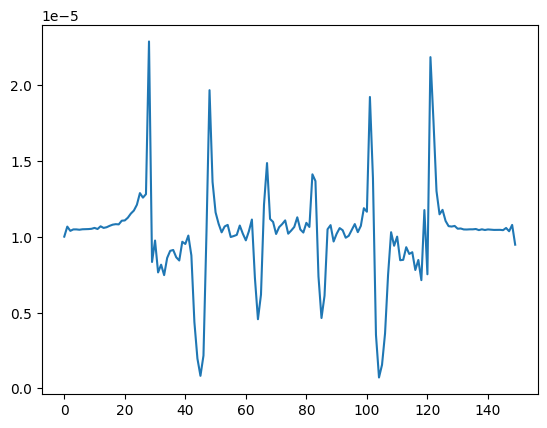

In [9]:
sp = config_dict["sim_params"]
detector_x = util.detector_x_vector(sp["detector_size"], sp["detector_pixel_size_x"])
plt.plot(wf[0])
print(wf[0])
print(detector_x)

## History

To see the interference pattern in empty space, we can record slices throughout the simulation and then plot them. `run_single_simulation` takes an optional argument `history_dz` defining the resolution with which we record the history.

Note that the history is not necessarily recorded with a constant z-spacing. Inside gratings and samples, one slice is recorded for every step. The history also records a list of z-coordinates at which the slices were recorded, which we can use for plotting.

In [ ]:
multisim.run_single_simulation(sim_path, 1, scratch_dir, save_keypoints_path=None, history_dz=0.02)

In [ ]:
# Path to the directory for the source with index 1
source_dir = multisim.get_sub_dir(sim_path, 1)

hist_x = np.load(source_dir / "history_x.npy")
hist_z = np.load(source_dir / "history_z.npy")
hist = np.load(source_dir / "history.npy")
plt.pcolormesh(
    hist_z,
    hist_x,
    hist,
    cmap="Greys_r",
    vmin=0,
    vmax=1e-6,
    shading="nearest",
)
plt.xlabel("z (m)")
plt.ylabel("x (m)")